In [1]:
#importing necessary modules for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [2]:
#load the dataSet
dataSet = pd.read_csv('H2HBABBA1653.csv')
dataSet.shape

(50000, 19)

In [3]:
#Print first 5 rows of dataset
dataSet.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200704858,WAKE llc,NaN,2020.0,1.930885e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,NaN,159417.50,20200512.0,NAA8,1.930885e+09,1
1,U001,0200726979,BJ'S associates,2019-10-15 00:00:00,2019.0,1.929934e+09,2019-09-27,20190927,20190927,20191012.0,USD,RV,1.0,NaN,469.71,20190927.0,NAA8,1.929934e+09,0
2,U001,0200707822,PUBLI llc,2019-08-21 00:00:00,2019.0,1.929715e+09,2019-08-06,20190807,20190806,20190821.0,USD,RV,1.0,NaN,182950.35,20190806.0,NAA8,1.929715e+09,0
3,U001,0200769623,WAL-MAR in,2019-09-16 00:00:00,2019.0,1.929822e+09,2019-09-04,20190902,20190904,20190919.0,USD,RV,1.0,NaN,48412.68,20190904.0,NAH4,1.929822e+09,0
4,U001,0200776463,KROGE llc,2019-06-05 00:00:00,2019.0,1.929355e+09,2019-05-21,20190521,20190521,20190605.0,USD,RV,1.0,NaN,145609.69,20190521.0,NAA8,1.929355e+09,0


In [4]:
#Info of my dataSet
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

# Check for null columns

In [5]:
#finding null columns in my data
[x for x in dataSet.columns if dataSet[x].isnull().sum() > 0]

['clear_date', 'area_business', 'invoice_id']

In [6]:
#checking the no of  null data in dataSet as a whole
dataSet.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

### Handling null colums

In [7]:
#So, here we clearly see area_business have 50,000 rows null where , our 
#dataSet itself contains 50,000 rows, that indicates -> area_business is 
#completly null so, we can drop this coulmn.
dataSet.drop(columns = ['area_business'],axis=1, inplace = True)

In [8]:
#checking the no of  null data in dataSet as a whole
dataSet.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

In [9]:
#Now lets see the null row of invoice_id and analyze that row importance on our model
dataSet[dataSet.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1097,CA02,0100030194,AMAZO,2019-05-23 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190313,20190323.0,CAD,X2,1.0,16418.95,20190313.0,CA10,NaN,0


In [10]:
#Now lets analyze
dataSet

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200704858,WAKE llc,NaN,2020.0,1.930885e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,159417.50,20200512.0,NAA8,1.930885e+09,1
1,U001,0200726979,BJ'S associates,2019-10-15 00:00:00,2019.0,1.929934e+09,2019-09-27,20190927,20190927,20191012.0,USD,RV,1.0,469.71,20190927.0,NAA8,1.929934e+09,0
2,U001,0200707822,PUBLI llc,2019-08-21 00:00:00,2019.0,1.929715e+09,2019-08-06,20190807,20190806,20190821.0,USD,RV,1.0,182950.35,20190806.0,NAA8,1.929715e+09,0
3,U001,0200769623,WAL-MAR in,2019-09-16 00:00:00,2019.0,1.929822e+09,2019-09-04,20190902,20190904,20190919.0,USD,RV,1.0,48412.68,20190904.0,NAH4,1.929822e+09,0
4,U001,0200776463,KROGE llc,2019-06-05 00:00:00,2019.0,1.929355e+09,2019-05-21,20190521,20190521,20190605.0,USD,RV,1.0,145609.69,20190521.0,NAA8,1.929355e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930706e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,4821.77,20200327.0,NAH4,1.930706e+09,1
49996,U001,0200759878,SA associates,2019-05-29 00:00:00,2019.0,1.929283e+09,2019-05-11,20190509,20190511,20190526.0,USD,RV,1.0,14257.87,20190511.0,NAH4,1.929283e+09,0
49997,U001,0200739534,OK llc,2019-02-01 00:00:00,2019.0,1.928647e+09,2019-01-18,20190118,20190118,20190202.0,USD,RV,1.0,60620.59,20190118.0,NAA8,1.928647e+09,0
49998,U001,0200769623,WAL-MAR co,2019-03-07 00:00:00,2019.0,1.928847e+09,2019-02-25,20190224,20190225,20190312.0,USD,RV,1.0,11402.98,20190225.0,NAH4,1.928847e+09,0


In [11]:
dataSet.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200704858,WAKE llc,NaN,2020.0,1.930885e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,159417.50,20200512.0,NAA8,1.930885e+09,1
1,U001,0200726979,BJ'S associates,2019-10-15 00:00:00,2019.0,1.929934e+09,2019-09-27,20190927,20190927,20191012.0,USD,RV,1.0,469.71,20190927.0,NAA8,1.929934e+09,0
2,U001,0200707822,PUBLI llc,2019-08-21 00:00:00,2019.0,1.929715e+09,2019-08-06,20190807,20190806,20190821.0,USD,RV,1.0,182950.35,20190806.0,NAA8,1.929715e+09,0
3,U001,0200769623,WAL-MAR in,2019-09-16 00:00:00,2019.0,1.929822e+09,2019-09-04,20190902,20190904,20190919.0,USD,RV,1.0,48412.68,20190904.0,NAH4,1.929822e+09,0
4,U001,0200776463,KROGE llc,2019-06-05 00:00:00,2019.0,1.929355e+09,2019-05-21,20190521,20190521,20190605.0,USD,RV,1.0,145609.69,20190521.0,NAA8,1.929355e+09,0


In [12]:
dataSet.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930706e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,4821.77,20200327.0,NAH4,1.930706e+09,1
49996,U001,0200759878,SA associates,2019-05-29 00:00:00,2019.0,1.929283e+09,2019-05-11,20190509,20190511,20190526.0,USD,RV,1.0,14257.87,20190511.0,NAH4,1.929283e+09,0
49997,U001,0200739534,OK llc,2019-02-01 00:00:00,2019.0,1.928647e+09,2019-01-18,20190118,20190118,20190202.0,USD,RV,1.0,60620.59,20190118.0,NAA8,1.928647e+09,0
49998,U001,0200769623,WAL-MAR co,2019-03-07 00:00:00,2019.0,1.928847e+09,2019-02-25,20190224,20190225,20190312.0,USD,RV,1.0,11402.98,20190225.0,NAH4,1.928847e+09,0
49999,U001,0200769623,WAL-MAR us,2019-07-25 00:00:00,2019.0,1.929588e+09,2019-07-09,20190708,20190709,20190724.0,USD,RV,1.0,8004.21,20190709.0,NAH4,1.929588e+09,0


In [13]:
#So, i found by seeing dataSet that 'doc_id' column and 'invoice_id' are quite same
#So, rather dropping that null row of invoice_id we can replace that null value of invoice_id
#with doc_id column.
# dataSet.iloc[1097].invoice_id = dataSet.iloc[1097].doc_id
dataSet['invoice_id'] = dataSet['invoice_id'].fillna(dataSet.iloc[1097].doc_id)

In [14]:
#So, cross-checking whether null values of invoice_id replaced or not
dataSet[dataSet.invoice_id.isnull()].invoice_id

Series([], Name: invoice_id, dtype: float64)

In [15]:
#So now we replace the null value now lets again check how many null cols are there
dataSet.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

# Preproccessing

In [16]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  total_open_amount       50000 non-null  float64
 14  baseline_create_date    50000 non-null

In [17]:
#Removing constants from our training dataSet
constant_columns_inDataSet = [x for x in dataSet if dataSet[x].nunique() == 1]
print(constant_columns_inDataSet)
dataSet.drop(constant_columns_inDataSet, axis=1, inplace=True)

['posting_id']


In [18]:
dataSet.shape

(50000, 17)

In [19]:
#Now checking for quasi columns in both dataSets
dataSet.nunique()

business_code                 6
cust_number                1412
name_customer              4106
clear_date                  399
buisness_year                 2
doc_id                    48822
posting_date                505
document_create_date        507
document_create_date.1      505
due_in_date                 542
invoice_currency              2
document type                 2
total_open_amount         44190
baseline_create_date        504
cust_payment_terms           77
invoice_id                48822
isOpen                        2
dtype: int64

In [20]:
#Here 'buisness_year', 'document type','isOpen' are quasi columns
#I think these columns are not necessary for our date prediction, so dropping them
dataSet.drop(['document type', 'buisness_year', 'isOpen'], axis=1, inplace=True)

In [21]:
dataSet.shape

(50000, 14)

In [22]:
#Lets check the corr of the columns
dataSet['doc_id'].corr(dataSet['invoice_id'])

0.9999999999999998

In [23]:
#Here i found both the columns are same, so decided to drop one of them
dataSet.drop('doc_id', axis=1, inplace=True)

In [24]:
dataSet.shape

(50000, 13)

In [25]:
#Changing all date column from object to datetime for future use
dataSet['posting_date'] = pd.to_datetime(dataSet['posting_date']).astype(np.int64)

In [26]:
dataSet['posting_date'] = pd.to_datetime(dataSet['posting_date'])

In [27]:
dataSet['document_create_date'] = pd.to_datetime(dataSet['document_create_date'],format='%Y%m%d')
dataSet['document_create_date.1'] = pd.to_datetime(dataSet['document_create_date.1'],format='%Y%m%d')
dataSet['due_in_date'] = pd.to_datetime(dataSet['due_in_date'],format='%Y%m%d')
dataSet['baseline_create_date'] = pd.to_datetime(dataSet['baseline_create_date'],format='%Y%m%d')

### Splliting trainSet and realTestSet

In [28]:
train_data = dataSet[dataSet['clear_date'].notnull()].copy()
train_data.shape

(40000, 13)

In [29]:
real_test = dataSet[dataSet['clear_date'].isnull()].copy()

In [30]:
real_test.shape

(10000, 13)

In [31]:
#Now changing clear_date datatype object to int in train_data
train_data['clear_date'] = pd.to_datetime(train_data['clear_date']).astype(np.int64)
train_data['clear_date'] = pd.to_datetime(train_data['clear_date'])

### Making Target column

In [32]:
train_data['delay'] = (train_data['clear_date'] - train_data['due_in_date']).dt.days

In [33]:
train_data

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
1,U001,0200726979,BJ'S associates,2019-10-15,2019-09-27,2019-09-27,2019-09-27,2019-10-12,USD,469.71,2019-09-27,NAA8,1.929934e+09,3
2,U001,0200707822,PUBLI llc,2019-08-21,2019-08-06,2019-08-07,2019-08-06,2019-08-21,USD,182950.35,2019-08-06,NAA8,1.929715e+09,0
3,U001,0200769623,WAL-MAR in,2019-09-16,2019-09-04,2019-09-02,2019-09-04,2019-09-19,USD,48412.68,2019-09-04,NAH4,1.929822e+09,-3
4,U001,0200776463,KROGE llc,2019-06-05,2019-05-21,2019-05-21,2019-05-21,2019-06-05,USD,145609.69,2019-05-21,NAA8,1.929355e+09,0
5,U001,0200705742,DOT corp,2019-05-29,2019-05-09,2019-05-09,2019-05-09,2019-06-10,USD,22226.52,2019-05-09,NA32,1.929283e+09,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200744019,TARG foundation,2019-03-12,2019-02-17,2019-02-17,2019-02-17,2019-03-04,USD,9164.16,2019-02-17,NAA8,1.928811e+09,8
49996,U001,0200759878,SA associates,2019-05-29,2019-05-11,2019-05-09,2019-05-11,2019-05-26,USD,14257.87,2019-05-11,NAH4,1.929283e+09,3
49997,U001,0200739534,OK llc,2019-02-01,2019-01-18,2019-01-18,2019-01-18,2019-02-02,USD,60620.59,2019-01-18,NAA8,1.928647e+09,-1
49998,U001,0200769623,WAL-MAR co,2019-03-07,2019-02-25,2019-02-24,2019-02-25,2019-03-12,USD,11402.98,2019-02-25,NAH4,1.928847e+09,-5


#### Sorting the train_data wrt 'posting_date'

In [34]:
train_data.sort_values(by='posting_date',inplace=True,ignore_index=1,ascending=True)

In [35]:
train_data

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200769623,WAL-MAR corporation,2019-01-10,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,42521.53,2018-12-30,NAH4,1.928544e+09,-4
1,U001,0200769623,WAL-MAR llc,2019-01-11,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,60734.67,2018-12-30,NAH4,1.928541e+09,-3
2,U001,0200704858,WAKE corporation,2019-01-14,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,17704.32,2018-12-30,NAA8,1.928541e+09,0
3,U001,0200704858,WAKE corporation,2019-01-14,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,17704.32,2018-12-30,NAA8,1.928541e+09,0
4,U001,0200769623,WAL-MAR foundation,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,14428.46,2018-12-30,NAH4,1.928541e+09,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,CA02,0140104950,MULT corporation,2020-03-09,2020-02-27,2020-02-27,2020-02-27,2020-03-10,CAD,17798.84,2020-02-29,CA10,2.960617e+09,-1
39996,U001,0200794332,COST trust,2020-03-12,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,38586.43,2020-02-27,NAAX,1.930577e+09,-1
39997,CA02,0140104392,FLANAG systems,2020-03-10,2020-02-27,2020-02-27,2020-02-27,2020-03-09,CAD,58200.54,2020-02-28,CA10,2.960618e+09,1
39998,U001,0200290370,BARGAIN corp,2020-03-16,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,3599.97,2020-02-27,NAA8,1.930577e+09,3


# Splitting train_data into X_train, X_test

In [36]:
X = train_data.drop('delay', axis=1)
y = train_data['delay']
train_data.shape

(40000, 14)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=False,
    test_size=0.2
)
X_train.shape , X_test.shape

((32000, 13), (8000, 13))

#### Splitting X_test into X_validation and X_test1

In [38]:
X_val, X_test1, y_val, y_test1 = train_test_split(
    X_test,
    y_test,
    test_size=.50,
    shuffle=False
)
X_val.shape, X_test1.shape

((4000, 13), (4000, 13))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

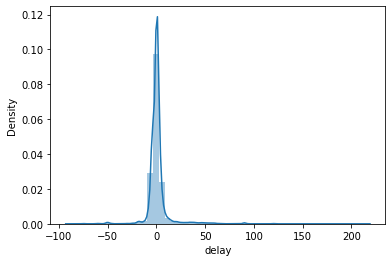

In [39]:
sns.distplot(y_train)

In [40]:
#Here above we observe that the distribution of the delay column
#is slightly right skewed, but its quite minimal. Hence good for work.

In [41]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,0,U001,0200769623,WAL-MAR corporation,2019-01-10,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,42521.53,2018-12-30,NAH4,1.928544e+09,-4
1,1,U001,0200769623,WAL-MAR llc,2019-01-11,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,60734.67,2018-12-30,NAH4,1.928541e+09,-3
2,2,U001,0200704858,WAKE corporation,2019-01-14,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,17704.32,2018-12-30,NAA8,1.928541e+09,0
3,3,U001,0200704858,WAKE corporation,2019-01-14,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,17704.32,2018-12-30,NAA8,1.928541e+09,0
4,4,U001,0200769623,WAL-MAR foundation,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,14428.46,2018-12-30,NAH4,1.928541e+09,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,31995,U001,0200592182,DECA,2019-12-02,2019-11-19,2019-11-19,2019-11-19,2019-12-09,USD,4821.25,2019-11-16,NAM4,1.930165e+09,-7
31996,31996,U001,0200762301,C&S WH associates,2019-12-04,2019-11-19,2019-11-17,2019-11-19,2019-12-04,USD,18415.71,2019-11-19,NAC6,1.930163e+09,0
31997,31997,U001,0200769623,WAL-MAR us,2019-12-02,2019-11-19,2019-11-18,2019-11-19,2019-12-04,USD,27465.54,2019-11-19,NAH4,1.930164e+09,-2
31998,31998,U001,0200705742,DOT,2019-12-04,2019-11-19,2019-11-19,2019-11-19,2019-12-04,USD,16980.61,2019-11-19,NAA8,1.930169e+09,0


<AxesSubplot:xlabel='delay', ylabel='posting_date'>

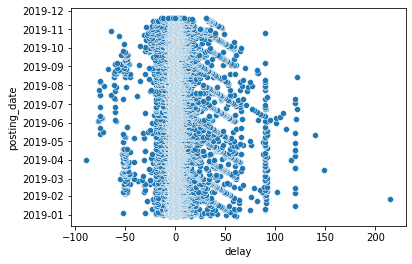

In [42]:
sns.scatterplot(data = X_train.merge(y_train,on = X_train.index),x = "delay",y = "posting_date")

In [43]:
#In the above graph we can see that majority of payment done around 0 to 100 days. 
#We can assume the negative value of delays to be 0.

<AxesSubplot:xlabel='delay', ylabel='due_in_date'>

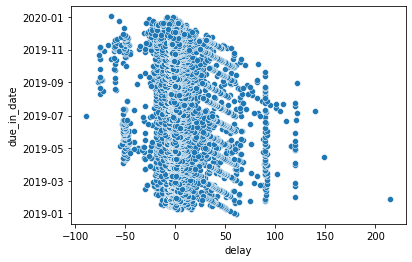

In [44]:
sns.scatterplot(data = X_train.merge(y_train,on = X_train.index),x = "delay",y = "due_in_date")

<AxesSubplot:xlabel='delay', ylabel='cust_payment_terms'>

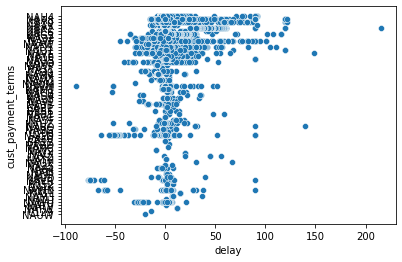

In [45]:
sns.scatterplot(data = X_train.merge(y_train,on = X_train.index),x = "delay",y = "cust_payment_terms")

<AxesSubplot:xlabel='delay', ylabel='invoice_id'>

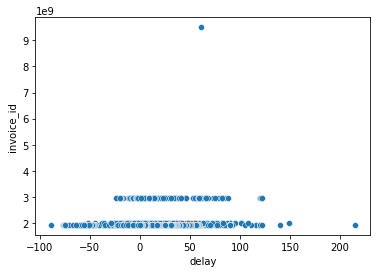

In [46]:
sns.scatterplot(data = X_train.merge(y_train,on = X_train.index),x = "delay",y = "invoice_id")

<AxesSubplot:xlabel='delay', ylabel='name_customer'>

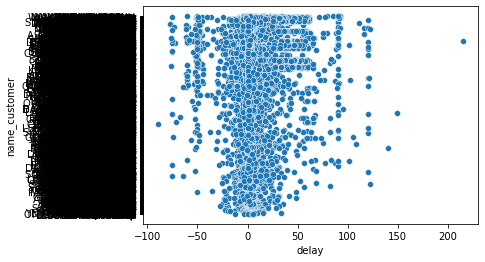

In [47]:
sns.scatterplot(data = X_train.merge(y_train,on = X_train.index),x = "delay",y = "name_customer")

<AxesSubplot:xlabel='delay', ylabel='baseline_create_date'>

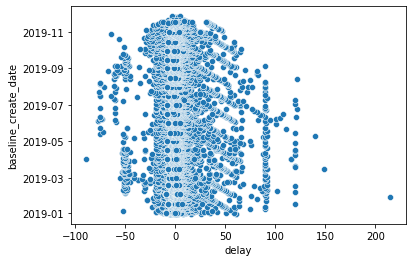

In [48]:
sns.scatterplot(data = X_train.merge(y_train,on = X_train.index),x = "delay",y = "baseline_create_date")

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 0 to 31999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32000 non-null  object        
 1   cust_number             32000 non-null  object        
 2   name_customer           32000 non-null  object        
 3   clear_date              32000 non-null  datetime64[ns]
 4   posting_date            32000 non-null  datetime64[ns]
 5   document_create_date    32000 non-null  datetime64[ns]
 6   document_create_date.1  32000 non-null  datetime64[ns]
 7   due_in_date             32000 non-null  datetime64[ns]
 8   invoice_currency        32000 non-null  object        
 9   total_open_amount       32000 non-null  float64       
 10  baseline_create_date    32000 non-null  datetime64[ns]
 11  cust_payment_terms      32000 non-null  object        
 12  invoice_id              32000 non-null  float6

In [50]:
#From document_create_date and document_create_date1 we can drop one of the column as it is quite same
X_train.drop('document_create_date' ,axis=1, inplace=True)
X_val.drop('document_create_date' ,axis=1, inplace=True)
X_test1.drop('document_create_date' ,axis=1, inplace=True)
real_test.drop('document_create_date' ,axis=1, inplace=True)

## Feature Engineering

In [51]:
#Making features from 'document_create_date.1' column

#So, basically i am not splitting due_date and clear_date column and dropping them because
#Both of the columns are used in creating our target column, so if we use that column then that will 
#consider as cheating.

X_train['doc_week']=pd.to_datetime(X_train['document_create_date.1']).dt.week
X_train['doc_mon']=pd.to_datetime(X_train['document_create_date.1']).dt.month
X_train['doc_day_of_week']=pd.to_datetime(X_train['document_create_date.1']).dt.dayofweek

X_test1['doc_week']=pd.to_datetime(X_test1['document_create_date.1']).dt.week
X_test1['doc_mon']=pd.to_datetime(X_test1['document_create_date.1']).dt.month
X_test1['doc_day_of_week']=pd.to_datetime(X_test1['document_create_date.1']).dt.dayofweek

X_val['doc_week']=pd.to_datetime(X_val['document_create_date.1']).dt.week
X_val['doc_mon']=pd.to_datetime(X_val['document_create_date.1']).dt.month
X_val['doc_day_of_week']=pd.to_datetime(X_val['document_create_date.1']).dt.dayofweek

real_test['doc_week']=pd.to_datetime(real_test['document_create_date.1']).dt.week
real_test['doc_mon']=pd.to_datetime(real_test['document_create_date.1']).dt.month
real_test['doc_day_of_week']=pd.to_datetime(real_test['document_create_date.1']).dt.dayofweek

In [52]:
#Dropping due_in_date from all sets
X_train.drop('due_in_date', axis=1, inplace=True)
X_val.drop('due_in_date', axis=1, inplace=True)
X_test1.drop('due_in_date', axis=1, inplace=True)
real_test.drop('due_in_date', axis=1, inplace=True)

In [53]:
#Dropping clear_date from all sets
X_train.drop('clear_date', axis=1, inplace=True)
X_val.drop('clear_date', axis=1, inplace=True)
X_test1.drop('clear_date', axis=1, inplace=True)
real_test.drop('clear_date', axis=1, inplace=True)

In [54]:
X_train.shape, X_test1.shape, X_val.shape, real_test.shape

((32000, 13), (4000, 13), (4000, 13), (10000, 13))

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 0 to 31999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32000 non-null  object        
 1   cust_number             32000 non-null  object        
 2   name_customer           32000 non-null  object        
 3   posting_date            32000 non-null  datetime64[ns]
 4   document_create_date.1  32000 non-null  datetime64[ns]
 5   invoice_currency        32000 non-null  object        
 6   total_open_amount       32000 non-null  float64       
 7   baseline_create_date    32000 non-null  datetime64[ns]
 8   cust_payment_terms      32000 non-null  object        
 9   invoice_id              32000 non-null  float64       
 10  doc_week                32000 non-null  int64         
 11  doc_mon                 32000 non-null  int64         
 12  doc_day_of_week         32000 non-null  int64 

In [56]:
#Converting total_open_amount into USD value if currency is CAD
X_train['total_open_amount'] = np.where((X_train['invoice_currency'] == "CAD"), X_train['total_open_amount']*0.81, X_train['total_open_amount'])
X_test1['total_open_amount'] = np.where((X_test1['invoice_currency'] == "CAD"), X_test1['total_open_amount']*0.81, X_test1['total_open_amount'])
X_val['total_open_amount'] = np.where((X_val['invoice_currency'] == "CAD"), X_val['total_open_amount']*0.81, X_val['total_open_amount'])
real_test['total_open_amount'] = np.where((real_test['invoice_currency'] == "CAD"), real_test['total_open_amount']*0.81, real_test['total_open_amount'])

In [57]:
X_train.describe()

,total_open_amount,invoice_id,doc_week,doc_mon,doc_day_of_week
count,3.200000e+04,3.200000e+04,32000.000000,32000.000000,32000.000000
mean,3.113069e+04,2.009511e+09,23.673594,5.850219,2.650406
std,3.837266e+04,2.769766e+08,13.177271,3.043489,1.806960
min,5.300000e-01,1.928490e+09,1.000000,1.000000,0.000000
25%,4.449975e+03,1.929049e+09,12.000000,3.000000,1.000000
50%,1.695308e+04,1.929532e+09,23.000000,6.000000,3.000000
75%,4.596814e+04,1.929909e+09,35.000000,8.000000,4.000000
max,1.673456e+06,9.500000e+09,52.000000,12.000000,6.000000


In [58]:
X_train.shape, X_test1.shape, X_val.shape, real_test.shape

((32000, 13), (4000, 13), (4000, 13), (10000, 13))

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 0 to 31999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32000 non-null  object        
 1   cust_number             32000 non-null  object        
 2   name_customer           32000 non-null  object        
 3   posting_date            32000 non-null  datetime64[ns]
 4   document_create_date.1  32000 non-null  datetime64[ns]
 5   invoice_currency        32000 non-null  object        
 6   total_open_amount       32000 non-null  float64       
 7   baseline_create_date    32000 non-null  datetime64[ns]
 8   cust_payment_terms      32000 non-null  object        
 9   invoice_id              32000 non-null  float64       
 10  doc_week                32000 non-null  int64         
 11  doc_mon                 32000 non-null  int64         
 12  doc_day_of_week         32000 non-null  int64 

In [60]:
real_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49995
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   posting_date            10000 non-null  datetime64[ns]
 4   document_create_date.1  10000 non-null  datetime64[ns]
 5   invoice_currency        10000 non-null  object        
 6   total_open_amount       10000 non-null  float64       
 7   baseline_create_date    10000 non-null  datetime64[ns]
 8   cust_payment_terms      10000 non-null  object        
 9   invoice_id              10000 non-null  float64       
 10  doc_week                10000 non-null  int64         
 11  doc_mon                 10000 non-null  int64         
 12  doc_day_of_week         10000 non-null  int64 

In [61]:
#Making feature of cust_payment_terms
X_train['cust_payment_terms'].value_counts()

NAA8    12880
NAH4     8345
CA10     2362
NAC6     1090
NAM4      820
NAAX      744
NAD1      635
NAG2      631
NAU5      616
NAGD      532
NA32      495
NAX2      465
NAM2      328
NA10      272
NAD5      240
NAVE      204
NAM1      183
NAVF      173
NAAW      164
NAWU      115
NAWN       97
NAVQ       86
NAVR       85
NAWP       49
NAVM       46
NA3B       39
NAUZ       36
NACB       28
CA30       27
NA38       24
NABG       18
C106       17
NAVL       14
NAB1       14
NA9X       11
NAVD       10
NA3F        9
NA8Q        9
NA84        9
NAD4        8
NATL        6
BR56        5
NATW        5
CAB1        5
CAX2        5
NA31        4
NAM3        4
NA25        4
NAVC        3
B052        3
NAWM        3
NATH        3
NAUP        3
NAUI        2
BR12        2
NAV2        2
NAUX        2
C129        1
CA60        1
NAUW        1
NANC        1
NATK        1
NATU        1
NATJ        1
NABD        1
NATV        1
Name: cust_payment_terms, dtype: int64

In [62]:
# clubbing cust_payment_terms with low occurance in dataset - to ensure model gets max information
cust_payment_Others_train = [x for x in X_train['cust_payment_terms'] if x not in ['NAA8', 'NAH4', 'CA10',
                                                                                   'NAC6', 'NAM4', 'NAAX',
                                                                                   'NAD1', 'NAG2', 'NAU5',
                                                                                   'NAGD', 'NA32', 'NAX2',
                                                                                   'NAM2', 'NA10', 'NAD5',
                                                                                   'NAVE', 'NAM1', 'NAVF',
                                                                                   'NAAW', 'NAWU']]

In [63]:
# clubbing cust_payment_terms with low occurance in dataset - to ensure model gets max information
cust_payment_Others_test1 = [x for x in X_test1['cust_payment_terms'] if x not in ['NAA8', 'NAH4', 'CA10',
                                                                                   'NAC6', 'NAM4', 'NAAX',
                                                                                   'NAD1', 'NAG2', 'NAU5',
                                                                                   'NAGD', 'NA32', 'NAX2',
                                                                                   'NAM2', 'NA10', 'NAD5',
                                                                                   'NAVE', 'NAM1', 'NAVF',
                                                                                   'NAAW', 'NAWU']]

In [64]:
# clubbing cust_payment_terms with low occurance in dataset - to ensure model gets max information
cust_payment_Others_val = [x for x in X_val['cust_payment_terms'] if x not in ['NAA8', 'NAH4', 'CA10',
                                                                                   'NAC6', 'NAM4', 'NAAX',
                                                                                   'NAD1', 'NAG2', 'NAU5',
                                                                                   'NAGD', 'NA32', 'NAX2',
                                                                                   'NAM2', 'NA10', 'NAD5',
                                                                                   'NAVE', 'NAM1', 'NAVF',
                                                                                   'NAAW', 'NAWU']]

In [65]:
# clubbing cust_payment_terms with low occurance in dataset - to ensure model gets max information
cust_payment_Others_realTest = [x for x in real_test['cust_payment_terms'] if x not in ['NAA8', 'NAH4', 'CA10',
                                                                                   'NAC6', 'NAM4', 'NAAX',
                                                                                   'NAD1', 'NAG2', 'NAU5',
                                                                                   'NAGD', 'NA32', 'NAX2',
                                                                                   'NAM2', 'NA10', 'NAD5',
                                                                                   'NAVE', 'NAM1', 'NAVF',
                                                                                   'NAAW', 'NAWU']]

In [66]:
#Now replacing those values
X_train['cust_payment_terms'] = X_train['cust_payment_terms'].replace(cust_payment_Others_train,'othersCust')
X_val['cust_payment_terms'] = X_val['cust_payment_terms'].replace(cust_payment_Others_val,'othersCust')
X_test1['cust_payment_terms'] = X_test1['cust_payment_terms'].replace(cust_payment_Others_test1,'othersCust')
real_test['cust_payment_terms'] = real_test['cust_payment_terms'].replace(cust_payment_Others_realTest,'othersCust')

In [67]:
X_train['cust_payment_terms'].value_counts()

NAA8          12880
NAH4           8345
CA10           2362
NAC6           1090
NAM4            820
NAAX            744
othersCust      706
NAD1            635
NAG2            631
NAU5            616
NAGD            532
NA32            495
NAX2            465
NAM2            328
NA10            272
NAD5            240
NAVE            204
NAM1            183
NAVF            173
NAAW            164
NAWU            115
Name: cust_payment_terms, dtype: int64

In [68]:
#Now label encode 'cust_payment_terms'
from sklearn.preprocessing import LabelEncoder
cust_payment_encoder = LabelEncoder()
cust_payment_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_enc'] = cust_payment_encoder.transform(X_train['cust_payment_terms'])

In [69]:
X_train[['cust_payment_enc', 'cust_payment_terms']]

,cust_payment_enc,cust_payment_terms
0,11,NAH4
1,11,NAH4
2,3,NAA8
3,3,NAA8
4,11,NAH4
...,...,...
31995,14,NAM4
31996,6,NAC6
31997,11,NAH4
31998,3,NAA8


In [70]:
X_val['cust_payment_enc'] = cust_payment_encoder.fit_transform(X_val['cust_payment_terms'])
X_val[['cust_payment_enc', 'cust_payment_terms']]

,cust_payment_enc,cust_payment_terms
32000,3,NAA8
32001,3,NAA8
32002,11,NAH4
32003,14,NAM4
32004,0,CA10
...,...,...
35995,11,NAH4
35996,11,NAH4
35997,3,NAA8
35998,11,NAH4


In [71]:
X_test1['cust_payment_enc'] = cust_payment_encoder.fit_transform(X_test1['cust_payment_terms'])
X_test1[['cust_payment_enc', 'cust_payment_terms']]

,cust_payment_enc,cust_payment_terms
36000,3,NAA8
36001,3,NAA8
36002,3,NAA8
36003,3,NAA8
36004,3,NAA8
...,...,...
39995,0,CA10
39996,5,NAAX
39997,0,CA10
39998,3,NAA8


In [72]:
real_test['cust_payment_enc'] = cust_payment_encoder.fit_transform(real_test['cust_payment_terms'])
real_test[['cust_payment_enc', 'cust_payment_terms']]

,cust_payment_enc,cust_payment_terms
0,3,NAA8
8,3,NAA8
13,11,NAH4
15,3,NAA8
16,15,NAU5
...,...,...
49980,11,NAH4
49981,3,NAA8
49992,15,NAU5
49994,0,CA10


In [73]:
X_train.shape, X_val.shape, X_test1.shape, real_test.shape

((32000, 14), (4000, 14), (4000, 14), (10000, 14))

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 0 to 31999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32000 non-null  object        
 1   cust_number             32000 non-null  object        
 2   name_customer           32000 non-null  object        
 3   posting_date            32000 non-null  datetime64[ns]
 4   document_create_date.1  32000 non-null  datetime64[ns]
 5   invoice_currency        32000 non-null  object        
 6   total_open_amount       32000 non-null  float64       
 7   baseline_create_date    32000 non-null  datetime64[ns]
 8   cust_payment_terms      32000 non-null  object        
 9   invoice_id              32000 non-null  float64       
 10  doc_week                32000 non-null  int64         
 11  doc_mon                 32000 non-null  int64         
 12  doc_day_of_week         32000 non-null  int64 

In [75]:
#Now drop 'cust_payment_terms' in all sets
X_train.drop("cust_payment_terms",axis=1,inplace=True)
X_val.drop("cust_payment_terms",axis=1,inplace=True)
X_test1.drop("cust_payment_terms",axis=1,inplace=True)
real_test.drop("cust_payment_terms",axis=1,inplace=True)

In [76]:
#Making feature of business_code
X_train['business_code'].value_counts()

U001    29004
CA02     2447
U013      438
U002      104
U005        6
U007        1
Name: business_code, dtype: int64

In [77]:
# clubbing business_code with low occurance in dataset - to ensure model gets max information
business_code_Others_train = [x for x in X_train['business_code'] if x not in ['U001', 'CA02', 'U013']]
business_code_Others_test1 = [x for x in X_test1['business_code'] if x not in ['U001', 'CA02', 'U013']]
business_code_Others_val = [x for x in X_val['business_code'] if x not in ['U001', 'CA02', 'U013']]
business_code_Others_realTest = [x for x in real_test['business_code'] if x not in ['U001', 'CA02', 'U013']]

In [78]:
#Now replacing those values
X_train['business_code'] = X_train['business_code'].replace(business_code_Others_train,'othersBusiness_Code')
X_val['business_code'] = X_val['business_code'].replace(business_code_Others_val,'othersBusiness_Code')
X_test1['business_code'] = X_test1['business_code'].replace(business_code_Others_test1,'othersBusiness_Code')
real_test['business_code'] = real_test['business_code'].replace(business_code_Others_realTest,'othersBusiness_Code')

In [79]:
X_train['business_code'].value_counts()

U001                   29004
CA02                    2447
U013                     438
othersBusiness_Code      111
Name: business_code, dtype: int64

In [80]:
#Now label encode 'business_code'
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])
X_train[['business_code_enc', 'business_code']]

,business_code_enc,business_code
0,1,U001
1,1,U001
2,1,U001
3,1,U001
4,1,U001
...,...,...
31995,1,U001
31996,1,U001
31997,1,U001
31998,1,U001


In [81]:
X_val['business_code_enc'] = business_code_encoder.fit_transform(X_val['business_code'])
X_val[['business_code_enc', 'business_code']]

,business_code_enc,business_code
32000,1,U001
32001,1,U001
32002,1,U001
32003,1,U001
32004,0,CA02
...,...,...
35995,1,U001
35996,1,U001
35997,1,U001
35998,1,U001


In [82]:
X_test1['business_code_enc'] = business_code_encoder.fit_transform(X_test1['business_code'])
X_test1[['business_code_enc', 'business_code']]

,business_code_enc,business_code
36000,1,U001
36001,1,U001
36002,1,U001
36003,1,U001
36004,1,U001
...,...,...
39995,0,CA02
39996,1,U001
39997,0,CA02
39998,1,U001


In [83]:
real_test['business_code_enc'] = business_code_encoder.fit_transform(real_test['business_code'])
real_test[['business_code_enc', 'business_code']]

,business_code_enc,business_code
0,1,U001
8,1,U001
13,1,U001
15,1,U001
16,1,U001
...,...,...
49980,1,U001
49981,1,U001
49992,1,U001
49994,0,CA02


In [84]:
X_train.shape, X_val.shape, X_test1.shape, real_test.shape

((32000, 14), (4000, 14), (4000, 14), (10000, 14))

In [85]:
#Now drop 'business_code' in all sets
X_train.drop("business_code",axis=1,inplace=True)
X_val.drop("business_code",axis=1,inplace=True)
X_test1.drop("business_code",axis=1,inplace=True)
real_test.drop("business_code",axis=1,inplace=True)

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 0 to 31999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             32000 non-null  object        
 1   name_customer           32000 non-null  object        
 2   posting_date            32000 non-null  datetime64[ns]
 3   document_create_date.1  32000 non-null  datetime64[ns]
 4   invoice_currency        32000 non-null  object        
 5   total_open_amount       32000 non-null  float64       
 6   baseline_create_date    32000 non-null  datetime64[ns]
 7   invoice_id              32000 non-null  float64       
 8   doc_week                32000 non-null  int64         
 9   doc_mon                 32000 non-null  int64         
 10  doc_day_of_week         32000 non-null  int64         
 11  cust_payment_enc        32000 non-null  int32         
 12  business_code_enc       32000 non-null  int32 

In [87]:
#Making feature of cust_number
X_train['cust_number'].value_counts()

0200769623    6951
0200726979    1191
0200762301     945
0200759878     831
0200794332     647
              ... 
200029010        1
100043944        1
100050364        1
200529372        1
0100030855       1
Name: cust_number, Length: 1262, dtype: int64

In [88]:
# clubbing cust_number with low occurance in dataset - to ensure model gets max information
custNumber_Others_train = [x for x in X_train['cust_number'] if x not in ['0200769623', '0200726979', '0200762301','0200759878','0200794332']]
custNumber_Others_test1 = [x for x in X_test1['cust_number'] if x not in ['0200769623', '0200726979', '0200762301','0200759878','0200794332']]
custNumber_Others_val = [x for x in X_val['cust_number'] if x not in ['0200769623', '0200726979', '0200762301','0200759878','0200794332']]
custNumber_Others_realTest = [x for x in real_test['cust_number'] if x not in ['0200769623', '0200726979', '0200762301','0200759878','0200794332']]

In [89]:
#Now replacing those values
X_train['cust_number'] = X_train['cust_number'].replace(custNumber_Others_train,'othersCust_number')
X_val['cust_number'] = X_val['cust_number'].replace(custNumber_Others_val,'othersCust_number')
X_test1['cust_number'] = X_test1['cust_number'].replace(custNumber_Others_test1,'othersCust_number')
real_test['cust_number'] = real_test['cust_number'].replace(custNumber_Others_realTest,'othersCust_number')

In [90]:
X_train['cust_number'].value_counts()

othersCust_number    21435
0200769623            6951
0200726979            1191
0200762301             945
0200759878             831
0200794332             647
Name: cust_number, dtype: int64

In [91]:
#Now label encode 'cust_number'
from sklearn.preprocessing import LabelEncoder
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_encoder.transform(X_train['cust_number'])
X_train[['cust_number_enc', 'cust_number']]

,cust_number_enc,cust_number
0,3,0200769623
1,3,0200769623
2,5,othersCust_number
3,5,othersCust_number
4,3,0200769623
...,...,...
31995,5,othersCust_number
31996,2,0200762301
31997,3,0200769623
31998,5,othersCust_number


In [92]:
X_val['cust_number_enc'] = cust_number_encoder.fit_transform(X_val['cust_number'])
X_val[['cust_number_enc', 'cust_number']]

,cust_number_enc,cust_number
32000,5,othersCust_number
32001,5,othersCust_number
32002,3,0200769623
32003,5,othersCust_number
32004,5,othersCust_number
...,...,...
35995,3,0200769623
35996,3,0200769623
35997,5,othersCust_number
35998,3,0200769623


In [93]:
X_test1['cust_number_enc'] = cust_number_encoder.fit_transform(X_test1['cust_number'])
X_test1[['cust_number_enc', 'cust_number']]

,cust_number_enc,cust_number
36000,5,othersCust_number
36001,5,othersCust_number
36002,0,0200726979
36003,5,othersCust_number
36004,5,othersCust_number
...,...,...
39995,5,othersCust_number
39996,4,0200794332
39997,5,othersCust_number
39998,5,othersCust_number


In [94]:
real_test['cust_number_enc'] = cust_number_encoder.fit_transform(real_test['cust_number'])
real_test[['cust_number_enc', 'cust_number']]

,cust_number_enc,cust_number
0,5,othersCust_number
8,0,0200726979
13,3,0200769623
15,0,0200726979
16,5,othersCust_number
...,...,...
49980,3,0200769623
49981,5,othersCust_number
49992,5,othersCust_number
49994,5,othersCust_number


In [95]:
X_train.shape, X_val.shape, X_test1.shape, real_test.shape

((32000, 14), (4000, 14), (4000, 14), (10000, 14))

In [96]:
#Now drop 'cust_number' in all sets
X_train.drop("cust_number",axis=1,inplace=True)
X_val.drop("cust_number",axis=1,inplace=True)
X_test1.drop("cust_number",axis=1,inplace=True)
real_test.drop("cust_number",axis=1,inplace=True)

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 0 to 31999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           32000 non-null  object        
 1   posting_date            32000 non-null  datetime64[ns]
 2   document_create_date.1  32000 non-null  datetime64[ns]
 3   invoice_currency        32000 non-null  object        
 4   total_open_amount       32000 non-null  float64       
 5   baseline_create_date    32000 non-null  datetime64[ns]
 6   invoice_id              32000 non-null  float64       
 7   doc_week                32000 non-null  int64         
 8   doc_mon                 32000 non-null  int64         
 9   doc_day_of_week         32000 non-null  int64         
 10  cust_payment_enc        32000 non-null  int32         
 11  business_code_enc       32000 non-null  int32         
 12  cust_number_enc         32000 non-null  int32 

In [98]:
#Making feature of name_customer
X_train['name_customer'].value_counts()

WAL-MAR associates     740
WAL-MAR trust          707
WAL-MAR corporation    690
WAL-MAR systems        685
WAL-MAR co             682
                      ... 
ACC D corporation        1
BEN E us                 1
GREA foundation          1
KITCH co                 1
LONGO  us                1
Name: name_customer, Length: 3506, dtype: int64

In [99]:
# clubbing 'name_customer' with low occurance in dataset - to ensure model gets max information
name_customer_Others_train = [x for x in X_train['name_customer'] if x not in ['WAL-MAR associates', 'WAL-MAR trust', 
                                                                               'WAL-MAR corporation', 'WAL-MAR systems',
                                                                               'WAL-MAR co']]
name_customer_Others_test1 = [x for x in X_test1['name_customer'] if x not in ['WAL-MAR associates', 'WAL-MAR trust', 
                                                                               'WAL-MAR corporation', 'WAL-MAR systems',
                                                                               'WAL-MAR co']]
name_customer_Others_val = [x for x in X_val['name_customer'] if x not in ['WAL-MAR associates', 'WAL-MAR trust', 
                                                                           'WAL-MAR corporation', 'WAL-MAR systems',
                                                                           'WAL-MAR co']]
name_customer_Others_realTest = [x for x in real_test['name_customer'] if x not in ['WAL-MAR associates', 'WAL-MAR trust', 
                                                                                    'WAL-MAR corporation', 'WAL-MAR systems',
                                                                                    'WAL-MAR co']]

In [100]:
#Now replacing those values
X_train['name_customer'] = X_train['name_customer'].replace(name_customer_Others_train,'othersCust_name')
X_val['name_customer'] = X_val['name_customer'].replace(name_customer_Others_val,'othersCust_name')
X_test1['name_customer'] = X_test1['name_customer'].replace(name_customer_Others_test1,'othersCust_name')
real_test['name_customer'] = real_test['name_customer'].replace(name_customer_Others_realTest,'othersCust_name')

In [101]:
X_train['name_customer'].value_counts()

othersCust_name        28496
WAL-MAR associates       740
WAL-MAR trust            707
WAL-MAR corporation      690
WAL-MAR systems          685
WAL-MAR co               682
Name: name_customer, dtype: int64

In [102]:
#Now label encode 'name_customer'
from sklearn.preprocessing import LabelEncoder
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = name_customer_encoder.transform(X_train['name_customer'])
X_train[['name_customer_enc', 'name_customer']]

,name_customer_enc,name_customer
0,2,WAL-MAR corporation
1,5,othersCust_name
2,5,othersCust_name
3,5,othersCust_name
4,5,othersCust_name
...,...,...
31995,5,othersCust_name
31996,5,othersCust_name
31997,5,othersCust_name
31998,5,othersCust_name


In [103]:
X_val['name_customer_enc'] = name_customer_encoder.fit_transform(X_val['name_customer'])
X_val[['name_customer_enc', 'name_customer']]

,name_customer_enc,name_customer
32000,5,othersCust_name
32001,5,othersCust_name
32002,2,WAL-MAR corporation
32003,5,othersCust_name
32004,5,othersCust_name
...,...,...
35995,5,othersCust_name
35996,5,othersCust_name
35997,5,othersCust_name
35998,5,othersCust_name


In [104]:
X_test1['name_customer_enc'] = name_customer_encoder.fit_transform(X_test1['name_customer'])
X_test1[['name_customer_enc', 'name_customer']]

,name_customer_enc,name_customer
36000,5,othersCust_name
36001,5,othersCust_name
36002,5,othersCust_name
36003,5,othersCust_name
36004,5,othersCust_name
...,...,...
39995,5,othersCust_name
39996,5,othersCust_name
39997,5,othersCust_name
39998,5,othersCust_name


In [105]:
real_test['name_customer_enc'] = name_customer_encoder.fit_transform(real_test['name_customer'])
real_test[['name_customer_enc', 'name_customer']]

,name_customer_enc,name_customer
0,5,othersCust_name
8,5,othersCust_name
13,2,WAL-MAR corporation
15,5,othersCust_name
16,5,othersCust_name
...,...,...
49980,5,othersCust_name
49981,5,othersCust_name
49992,5,othersCust_name
49994,5,othersCust_name


In [106]:
#Now drop 'name_customer' in all sets
X_train.drop("name_customer",axis=1,inplace=True)
X_val.drop("name_customer",axis=1,inplace=True)
X_test1.drop("name_customer",axis=1,inplace=True)
real_test.drop("name_customer",axis=1,inplace=True)

In [107]:
X_train.shape, X_val.shape, X_test1.shape, real_test.shape

((32000, 13), (4000, 13), (4000, 13), (10000, 13))

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 0 to 31999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   posting_date            32000 non-null  datetime64[ns]
 1   document_create_date.1  32000 non-null  datetime64[ns]
 2   invoice_currency        32000 non-null  object        
 3   total_open_amount       32000 non-null  float64       
 4   baseline_create_date    32000 non-null  datetime64[ns]
 5   invoice_id              32000 non-null  float64       
 6   doc_week                32000 non-null  int64         
 7   doc_mon                 32000 non-null  int64         
 8   doc_day_of_week         32000 non-null  int64         
 9   cust_payment_enc        32000 non-null  int32         
 10  business_code_enc       32000 non-null  int32         
 11  cust_number_enc         32000 non-null  int32         
 12  name_customer_enc       32000 non-null  int32 

In [109]:
#Now i have decided to drop 'posting_date', 'document_create_date.1','baseline_create_date'
#As i think they don't have any use
X_train.drop(['posting_date','document_create_date.1','baseline_create_date'],axis=1,inplace=True)
X_test1.drop(['posting_date','document_create_date.1','baseline_create_date'],axis=1,inplace=True)
X_val.drop(['posting_date','document_create_date.1','baseline_create_date'],axis=1,inplace=True)
real_test.drop(['posting_date','document_create_date.1','baseline_create_date'],axis=1,inplace=True)

In [110]:
#Making a feature of invoice_currency by binarization
X_train['invoice_currency']=np.where(X_train['invoice_currency']=="USD",1,0)
X_test1['invoice_currency']=np.where(X_test1['invoice_currency']=="USD",1,0)
X_val['invoice_currency']=np.where(X_val['invoice_currency']=="USD",1,0)
real_test['invoice_currency']=np.where(real_test['invoice_currency']=="USD",1,0)

In [111]:
X_train.shape, X_val.shape, X_test1.shape, real_test.shape

((32000, 10), (4000, 10), (4000, 10), (10000, 10))

### Feature Selection

In [112]:
#As now our dataSets contain all numeric datatype now we can use VarianceThreshold
#Checking for constant columns in our datasets
from sklearn.feature_selection import VarianceThreshold
thres = VarianceThreshold(threshold=0)
thres.fit(X_train)

VarianceThreshold(threshold=0)

In [113]:
#Now to see the no of non-constant columns in X_train
len(X_train.columns[thres.get_support()])

10

In [114]:
#Now to see the no of non-constant columns in X_test1
len(X_test1.columns[thres.get_support()])

10

In [115]:
#Now to see the no of non-constant columns in X_val
len(X_val.columns[thres.get_support()])

10

In [116]:
#Now to see the no of non-constant columns in real_test
len(real_test.columns[thres.get_support()])

10

In [117]:
#So here we can see that all dataSets contain 10 column and no. of
#non-constants columns comming 10, so that mean there is no constant column
#in all dataSets

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

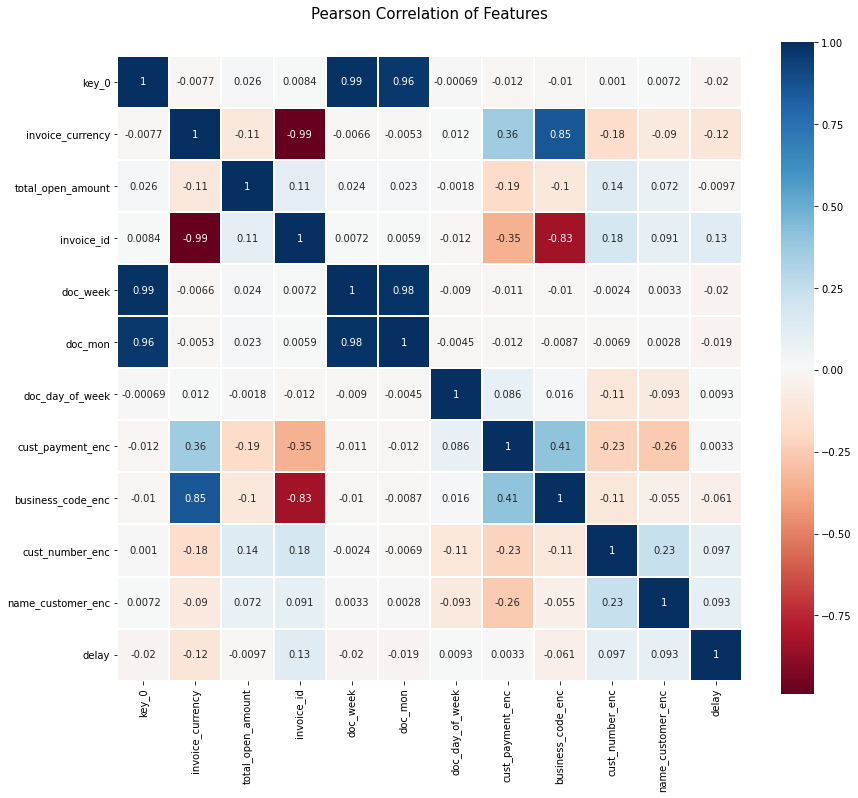

In [118]:
#Plotting heat_map
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Modelling

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [120]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [121]:
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test1)

In [122]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test1, predicted))
R2_Score.append(r2_score(y_test1, predicted))

In [123]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test1)

In [124]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test1, predicted))
R2_Score.append(r2_score(y_test1, predicted))

In [125]:
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test1)

In [126]:
MSE_Score.append(mean_squared_error(y_test1, predicted))
R2_Score.append(r2_score(y_test1, predicted))

In [127]:
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test1)

In [128]:
MSE_Score.append(mean_squared_error(y_test1, predicted))
R2_Score.append(r2_score(y_test1, predicted))

In [129]:
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test1)

In [130]:
MSE_Score.append(mean_squared_error(y_test1, predicted))
R2_Score.append(r2_score(y_test1, predicted))

In [131]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [132]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,104.563990,0.034017
1,Support Vector Regression,105.386499,0.026419
2,Decision Tree Regressor,321.971750,-1.974438
3,Random Forest Regressor,93.035495,0.140520
4,XGB Regressor,80.250071,0.258634


### Using real_test dataSet

In [133]:
real_test

,invoice_currency,total_open_amount,invoice_id,doc_week,doc_mon,doc_day_of_week,cust_payment_enc,business_code_enc,cust_number_enc,name_customer_enc
0,1,159417.5000,1.930885e+09,20,5,1,3,1,5,5
8,1,118.5500,1.930604e+09,10,3,3,3,1,0,5
13,1,9190.8200,1.930738e+09,14,4,5,11,1,3,2
15,1,571.1500,1.930804e+09,17,4,1,3,1,0,5
16,1,162006.0900,1.930793e+09,16,4,3,15,1,5,5
...,...,...,...,...,...,...,...,...,...,...
49980,1,57417.1500,1.930623e+09,10,3,6,11,1,3,5
49981,1,53718.5500,1.930684e+09,12,3,5,3,1,5,5
49992,1,2167.6800,1.930826e+09,17,4,4,15,1,5,5
49994,0,4705.9704,2.960623e+09,13,3,0,0,0,5,5


In [134]:
#I am using XGB Regressor because its giving me good result
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(real_test)

In [135]:
#So, these are predicted delay dates
print(predicted)

[-0.11942871 -1.1968303  -0.78051716 ...  0.8301444  -0.8216294
 -3.8150704 ]


In [136]:
#Rounding the values
predicted1=np.round(pd.DataFrame(predicted))

In [137]:
#Renamimg column name
predicted1 = predicted1.rename(columns = {0: 'predicted'})
predicted1

,predicted
0,-0.0
1,-1.0
2,-1.0
3,2.0
4,1.0
...,...
9995,-2.0
9996,2.0
9997,1.0
9998,-1.0


In [138]:
#Analysing predited1
predicted1.describe()

,predicted
count,10000.000000
mean,0.202400
std,5.428571
min,-45.000000
25%,-2.000000
50%,1.000000
75%,2.000000
max,62.000000


In [139]:
#So, as I need  due_in_date column in my real_test dataSet to calculate
#predicted_clear_date, but in my X_train, X_test1, X_val datasets, there is no due_in_date ,
#and according to rule real_test dataset must contains same columns as
#X_train, X_test1, X_val datasets, and i had already predicted the delay date above by using real_test dataset
#so, i read again my csv and choose the same 10,000 columns as real_test where i drop clear_date column
#and by the help of due_in_date and predicted_delay i will calculate clear_date column.

realTestDataFrame = pd.read_csv('H2HBABBA1653.csv')
realTestDataFrame.shape

(50000, 19)

In [140]:
#Copy the rows where clear_date is null
realTestDataSet = realTestDataFrame[realTestDataFrame['clear_date'].isnull()].copy()
realTestDataSet.shape

(10000, 19)

In [141]:
#Here i drop clear_date because i have to predict that columns
realTestDataSet.drop('clear_date', axis=1,inplace=True)

In [142]:
realTestDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49995
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  object 
 1   cust_number             10000 non-null  object 
 2   name_customer           10000 non-null  object 
 3   buisness_year           10000 non-null  float64
 4   doc_id                  10000 non-null  float64
 5   posting_date            10000 non-null  object 
 6   document_create_date    10000 non-null  int64  
 7   document_create_date.1  10000 non-null  int64  
 8   due_in_date             10000 non-null  float64
 9   invoice_currency        10000 non-null  object 
 10  document type           10000 non-null  object 
 11  posting_id              10000 non-null  float64
 12  area_business           0 non-null      float64
 13  total_open_amount       10000 non-null  float64
 14  baseline_create_date    10000 non-null

In [143]:
#Converting the due_in_date from float to datetime
realTestDataSet['due_in_date'] = pd.to_datetime(realTestDataSet['due_in_date'],format='%Y%m%d')

In [144]:
realTestDataSet['due_in_date']

0       2020-05-27
8       2020-03-20
13      2020-04-19
15      2020-05-06
16      2020-05-01
           ...    
49980   2020-03-23
49981   2020-04-05
49992   2020-05-09
49994   2020-04-02
49995   2020-04-11
Name: due_in_date, Length: 10000, dtype: datetime64[ns]

In [145]:
#Resetting index
realTestDataSet.reset_index(drop=True,inplace=True)

In [146]:
realTestDataSet['due_in_date']

0      2020-05-27
1      2020-03-20
2      2020-04-19
3      2020-05-06
4      2020-05-01
          ...    
9995   2020-03-23
9996   2020-04-05
9997   2020-05-09
9998   2020-04-02
9999   2020-04-11
Name: due_in_date, Length: 10000, dtype: datetime64[ns]

In [147]:
#Making a new column in realtestDataset of predicted delays
realTestDataSet['predicted_days'] = predicted1['predicted']

In [148]:
#Age bucket
bins = [0,15,30,45,60,1000]
category = ["0-15 days", "16-30 days","31-45 days","46-60 days", "Greater than 60 days"]

In [149]:
realTestDataSet['age_bucket'] = pd.cut(realTestDataSet['predicted_days'], bins, labels = category)

In [150]:
realTestDataSet

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted_days,age_bucket
0,U001,200704858,WAKE llc,2020.0,1.930885e+09,2020-05-12,20200511,20200512,2020-05-27,USD,RV,1.0,NaN,159417.50,20200512.0,NAA8,1.930885e+09,1,-0.0,NaN
1,U001,0200726979,BJ'S associates,2020.0,1.930604e+09,2020-03-05,20200305,20200305,2020-03-20,USD,RV,1.0,NaN,118.55,20200305.0,NAA8,1.930604e+09,1,-1.0,NaN
2,U001,0200769623,WAL-MAR corporation,2020.0,1.930738e+09,2020-04-04,20200403,20200404,2020-04-19,USD,RV,1.0,NaN,9190.82,20200404.0,NAH4,1.930738e+09,1,-1.0,NaN
3,U001,0200726979,BJ'S foundation,2020.0,1.930804e+09,2020-04-21,20200420,20200421,2020-05-06,USD,RV,1.0,NaN,571.15,20200421.0,NAA8,1.930804e+09,1,2.0,0-15 days
4,U001,0200772670,ASSOCIAT systems,2020.0,1.930793e+09,2020-04-16,20200416,20200416,2020-05-01,USD,RV,1.0,NaN,162006.09,20200416.0,NAU5,1.930793e+09,1,1.0,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200769623,WAL-MAR llc,2020.0,1.930623e+09,2020-03-08,20200308,20200308,2020-03-23,USD,RV,1.0,NaN,57417.15,20200308.0,NAH4,1.930623e+09,1,-2.0,NaN
9996,U001,0200704045,RA us,2020.0,1.930684e+09,2020-03-21,20200321,20200321,2020-04-05,USD,RV,1.0,NaN,53718.55,20200321.0,NAA8,1.930684e+09,1,2.0,0-15 days
9997,U001,0200772670,ASSOCIAT co,2020.0,1.930826e+09,2020-04-24,20200425,20200424,2020-05-09,USD,RV,1.0,NaN,2167.68,20200424.0,NAU5,1.930826e+09,1,1.0,0-15 days
9998,CA02,0140106408,WAL-M llc,2020.0,2.960623e+09,2020-03-23,20200323,20200323,2020-04-02,CAD,RV,1.0,NaN,5809.84,20200323.0,CA10,2.960623e+09,1,-1.0,NaN


In [151]:
#Replacing null values with 0-15 days
realTestDataSet['age_bucket'].fillna("0-15 days", inplace=True)

In [152]:
#Changing the datatype of age_bucket to str
realTestDataSet['age_bucket'] = realTestDataSet['age_bucket'].astype(str)

In [153]:
#Converting the predicted_days to datetime.
realTestDataSet['predicted_days'] = pd.to_timedelta(realTestDataSet['predicted_days'], unit='d')

In [154]:
realTestDataSet

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted_days,age_bucket
0,U001,200704858,WAKE llc,2020.0,1.930885e+09,2020-05-12,20200511,20200512,2020-05-27,USD,RV,1.0,NaN,159417.50,20200512.0,NAA8,1.930885e+09,1,0 days,0-15 days
1,U001,0200726979,BJ'S associates,2020.0,1.930604e+09,2020-03-05,20200305,20200305,2020-03-20,USD,RV,1.0,NaN,118.55,20200305.0,NAA8,1.930604e+09,1,-1 days,0-15 days
2,U001,0200769623,WAL-MAR corporation,2020.0,1.930738e+09,2020-04-04,20200403,20200404,2020-04-19,USD,RV,1.0,NaN,9190.82,20200404.0,NAH4,1.930738e+09,1,-1 days,0-15 days
3,U001,0200726979,BJ'S foundation,2020.0,1.930804e+09,2020-04-21,20200420,20200421,2020-05-06,USD,RV,1.0,NaN,571.15,20200421.0,NAA8,1.930804e+09,1,2 days,0-15 days
4,U001,0200772670,ASSOCIAT systems,2020.0,1.930793e+09,2020-04-16,20200416,20200416,2020-05-01,USD,RV,1.0,NaN,162006.09,20200416.0,NAU5,1.930793e+09,1,1 days,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200769623,WAL-MAR llc,2020.0,1.930623e+09,2020-03-08,20200308,20200308,2020-03-23,USD,RV,1.0,NaN,57417.15,20200308.0,NAH4,1.930623e+09,1,-2 days,0-15 days
9996,U001,0200704045,RA us,2020.0,1.930684e+09,2020-03-21,20200321,20200321,2020-04-05,USD,RV,1.0,NaN,53718.55,20200321.0,NAA8,1.930684e+09,1,2 days,0-15 days
9997,U001,0200772670,ASSOCIAT co,2020.0,1.930826e+09,2020-04-24,20200425,20200424,2020-05-09,USD,RV,1.0,NaN,2167.68,20200424.0,NAU5,1.930826e+09,1,1 days,0-15 days
9998,CA02,0140106408,WAL-M llc,2020.0,2.960623e+09,2020-03-23,20200323,20200323,2020-04-02,CAD,RV,1.0,NaN,5809.84,20200323.0,CA10,2.960623e+09,1,-1 days,0-15 days


In [155]:
#Predicted clear_date = due_date + predicted_days
realTestDataSet['predicted_clear_date'] = realTestDataSet['due_in_date'] + realTestDataSet['predicted_days']

In [156]:
realTestDataSet

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted_days,age_bucket,predicted_clear_date
0,U001,200704858,WAKE llc,2020.0,1.930885e+09,2020-05-12,20200511,20200512,2020-05-27,USD,RV,1.0,NaN,159417.50,20200512.0,NAA8,1.930885e+09,1,0 days,0-15 days,2020-05-27
1,U001,0200726979,BJ'S associates,2020.0,1.930604e+09,2020-03-05,20200305,20200305,2020-03-20,USD,RV,1.0,NaN,118.55,20200305.0,NAA8,1.930604e+09,1,-1 days,0-15 days,2020-03-19
2,U001,0200769623,WAL-MAR corporation,2020.0,1.930738e+09,2020-04-04,20200403,20200404,2020-04-19,USD,RV,1.0,NaN,9190.82,20200404.0,NAH4,1.930738e+09,1,-1 days,0-15 days,2020-04-18
3,U001,0200726979,BJ'S foundation,2020.0,1.930804e+09,2020-04-21,20200420,20200421,2020-05-06,USD,RV,1.0,NaN,571.15,20200421.0,NAA8,1.930804e+09,1,2 days,0-15 days,2020-05-08
4,U001,0200772670,ASSOCIAT systems,2020.0,1.930793e+09,2020-04-16,20200416,20200416,2020-05-01,USD,RV,1.0,NaN,162006.09,20200416.0,NAU5,1.930793e+09,1,1 days,0-15 days,2020-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200769623,WAL-MAR llc,2020.0,1.930623e+09,2020-03-08,20200308,20200308,2020-03-23,USD,RV,1.0,NaN,57417.15,20200308.0,NAH4,1.930623e+09,1,-2 days,0-15 days,2020-03-21
9996,U001,0200704045,RA us,2020.0,1.930684e+09,2020-03-21,20200321,20200321,2020-04-05,USD,RV,1.0,NaN,53718.55,20200321.0,NAA8,1.930684e+09,1,2 days,0-15 days,2020-04-07
9997,U001,0200772670,ASSOCIAT co,2020.0,1.930826e+09,2020-04-24,20200425,20200424,2020-05-09,USD,RV,1.0,NaN,2167.68,20200424.0,NAU5,1.930826e+09,1,1 days,0-15 days,2020-05-10
9998,CA02,0140106408,WAL-M llc,2020.0,2.960623e+09,2020-03-23,20200323,20200323,2020-04-02,CAD,RV,1.0,NaN,5809.84,20200323.0,CA10,2.960623e+09,1,-1 days,0-15 days,2020-04-01


In [157]:
realTestDataSet   

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted_days,age_bucket,predicted_clear_date
0,U001,200704858,WAKE llc,2020.0,1.930885e+09,2020-05-12,20200511,20200512,2020-05-27,USD,RV,1.0,NaN,159417.50,20200512.0,NAA8,1.930885e+09,1,0 days,0-15 days,2020-05-27
1,U001,0200726979,BJ'S associates,2020.0,1.930604e+09,2020-03-05,20200305,20200305,2020-03-20,USD,RV,1.0,NaN,118.55,20200305.0,NAA8,1.930604e+09,1,-1 days,0-15 days,2020-03-19
2,U001,0200769623,WAL-MAR corporation,2020.0,1.930738e+09,2020-04-04,20200403,20200404,2020-04-19,USD,RV,1.0,NaN,9190.82,20200404.0,NAH4,1.930738e+09,1,-1 days,0-15 days,2020-04-18
3,U001,0200726979,BJ'S foundation,2020.0,1.930804e+09,2020-04-21,20200420,20200421,2020-05-06,USD,RV,1.0,NaN,571.15,20200421.0,NAA8,1.930804e+09,1,2 days,0-15 days,2020-05-08
4,U001,0200772670,ASSOCIAT systems,2020.0,1.930793e+09,2020-04-16,20200416,20200416,2020-05-01,USD,RV,1.0,NaN,162006.09,20200416.0,NAU5,1.930793e+09,1,1 days,0-15 days,2020-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200769623,WAL-MAR llc,2020.0,1.930623e+09,2020-03-08,20200308,20200308,2020-03-23,USD,RV,1.0,NaN,57417.15,20200308.0,NAH4,1.930623e+09,1,-2 days,0-15 days,2020-03-21
9996,U001,0200704045,RA us,2020.0,1.930684e+09,2020-03-21,20200321,20200321,2020-04-05,USD,RV,1.0,NaN,53718.55,20200321.0,NAA8,1.930684e+09,1,2 days,0-15 days,2020-04-07
9997,U001,0200772670,ASSOCIAT co,2020.0,1.930826e+09,2020-04-24,20200425,20200424,2020-05-09,USD,RV,1.0,NaN,2167.68,20200424.0,NAU5,1.930826e+09,1,1 days,0-15 days,2020-05-10
9998,CA02,0140106408,WAL-M llc,2020.0,2.960623e+09,2020-03-23,20200323,20200323,2020-04-02,CAD,RV,1.0,NaN,5809.84,20200323.0,CA10,2.960623e+09,1,-1 days,0-15 days,2020-04-01


# Thank you HRC